# Generating PSF

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import sep

In [4]:
from photutils.centroids import centroid_com

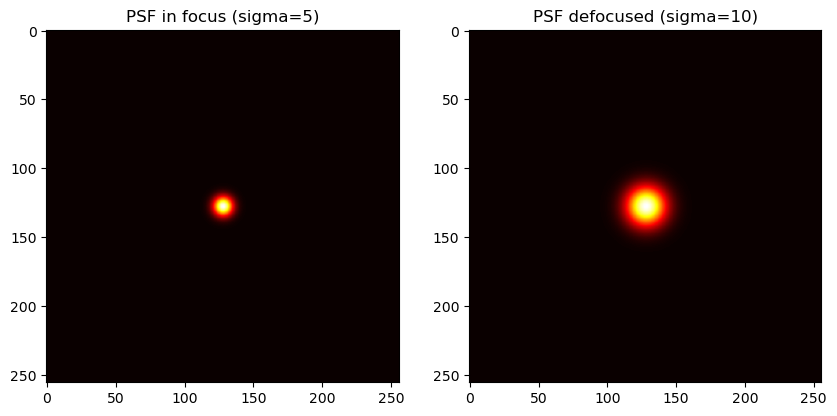

In [5]:

def gaussian_psf(size, sigma, center=None):
    """
    Generate a 2D Gaussian PSF.
    :param size: Tuple of the shape of the image (height, width)
    :param sigma: Standard deviation of the Gaussian PSF
    :param center: Tuple for the center of the PSF (y, x). If None, it will be at the center of the image.
    :return: 2D numpy array representing the PSF
    """
    y, x = np.indices(size)
    
    if center is None:
        center_y, center_x = size[0] // 2, size[1] // 2
    else:
        center_y, center_x = center
    
    gauss = np.exp(-((x - center_x)**2 + (y - center_y)**2) / (2 * sigma**2))
    return gauss / gauss.max()  # Normalize to have max value of 1

# Image parameters
size = (256, 256)

# Generate PSFs with different sigma (defocus effect)
sigma_in_focus = 5
sigma_defocused = 10

psf_in_focus = gaussian_psf(size, sigma_in_focus)
psf_defocused = gaussian_psf(size, sigma_defocused)

# Display the PSFs
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(psf_in_focus, cmap='hot')
axes[0].set_title(f"PSF in focus (sigma={sigma_in_focus})")
axes[1].imshow(psf_defocused, cmap='hot')
axes[1].set_title(f"PSF defocused (sigma={sigma_defocused})")

plt.show()


# Yaw

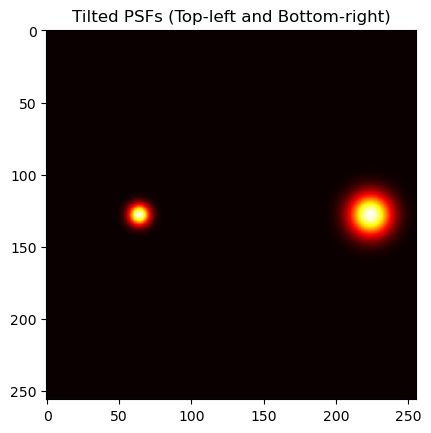

In [6]:
# Tilt parameters
sigma = 5
psf_top_left = gaussian_psf(size, sigma, center=(size[0]/2, size[0]/4))
psf_bottom_right = gaussian_psf(size, sigma*2, center=(size[0]/2, size[0]/2 + (size[0]/2*(3/4))))

# Sum the two PSFs to simulate tilt
psf_tilt = psf_top_left + psf_bottom_right

# Display the tilted PSFs
plt.imshow(psf_tilt, cmap='hot')
plt.title("Tilted PSFs (Top-left and Bottom-right)")
plt.show()


# Roll

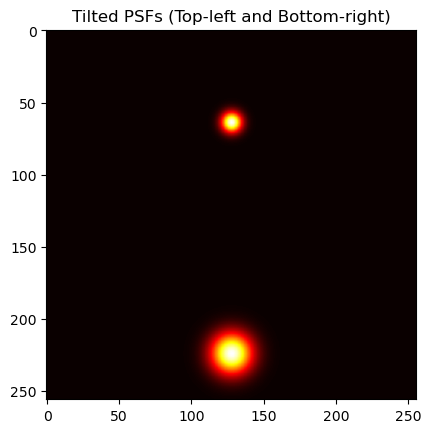

In [7]:
# Tilt parameters
sigma = 5
psf_top_left = gaussian_psf(size, sigma, center=( size[0]/4, size[0]/2))
psf_bottom_right = gaussian_psf(size, sigma*2, center=( size[0]/2 + (size[0]/2*(3/4)),size[0]/2,))

# Sum the two PSFs to simulate tilt
psf_tilt = psf_top_left + psf_bottom_right

# Display the tilted PSFs
plt.imshow(psf_tilt, cmap='hot')
plt.title("Tilted PSFs (Top-left and Bottom-right)")
plt.show()


# Strategy

In [8]:
# Parameters for the sequence
min_sigma = 3   # Minimum PSF size
max_sigma = 15  # Maximum PSF size
n_frames = 20   # Number of frames in the sequence

# Generate the sequence of sigmas
sigmas = np.concatenate([np.linspace(max_sigma, min_sigma, n_frames//2),
                         np.linspace(min_sigma, max_sigma, n_frames//2)])

# Initialize a 3D array (cube of data) to store the PSF evolution
psf_cube = np.zeros((n_frames, size[0], size[1]))

# Fill the data cube with PSFs for each sigma
for i, sigma in enumerate(sigmas):
    psf_cube[i, :, :] = gaussian_psf(size, sigma)

# `psf_cube` now contains the sequence of PSFs
# The shape of the cube will be (n_frames, height, width)

print("Data cube generated with shape:", psf_cube.shape)

Data cube generated with shape: (20, 256, 256)


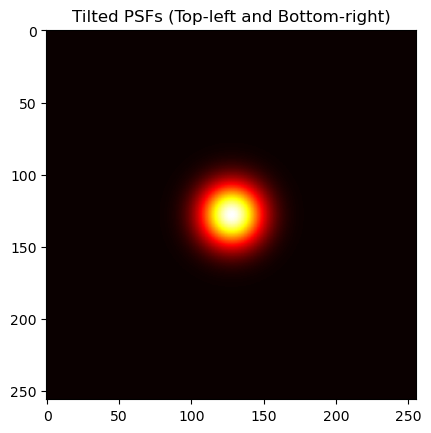

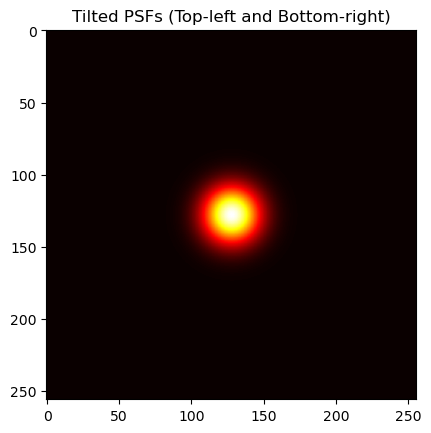

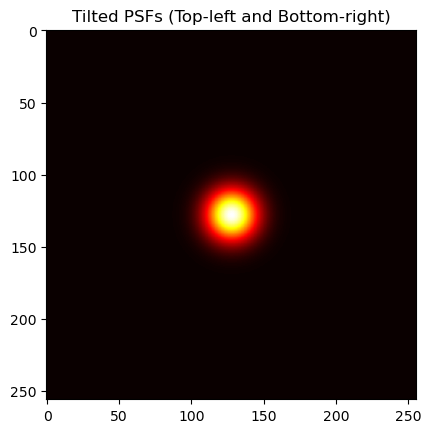

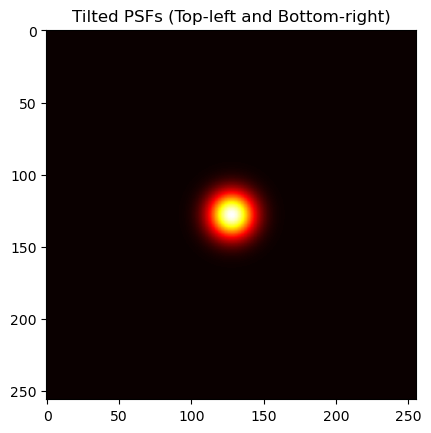

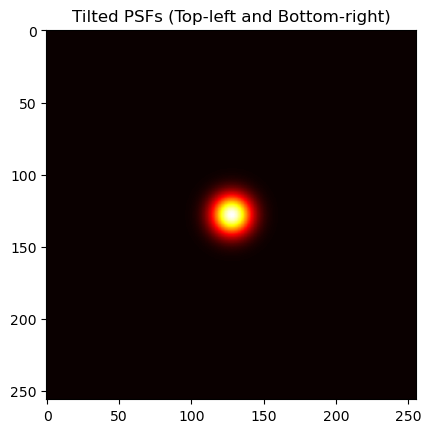

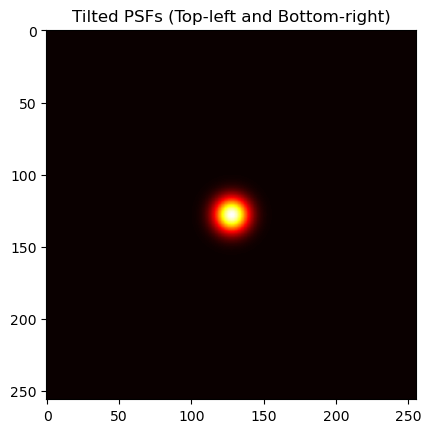

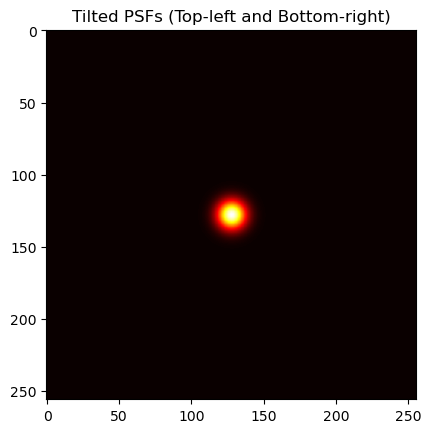

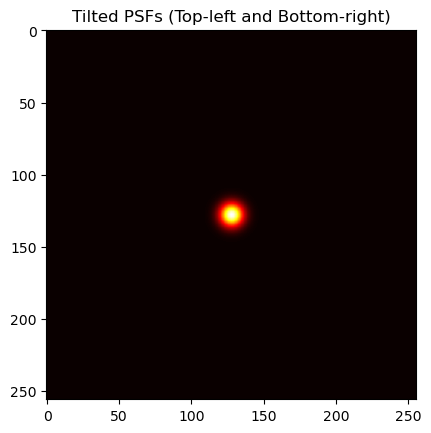

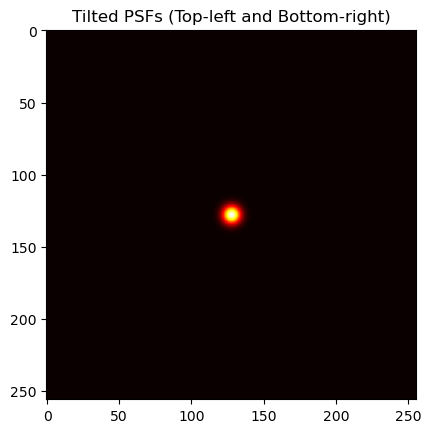

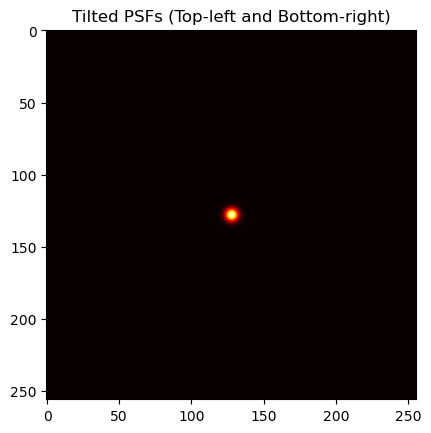

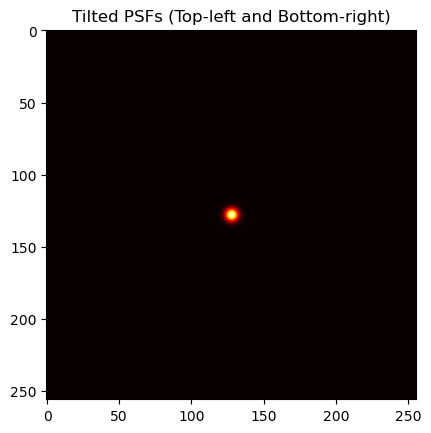

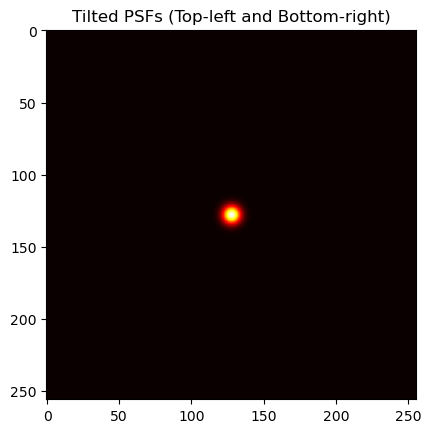

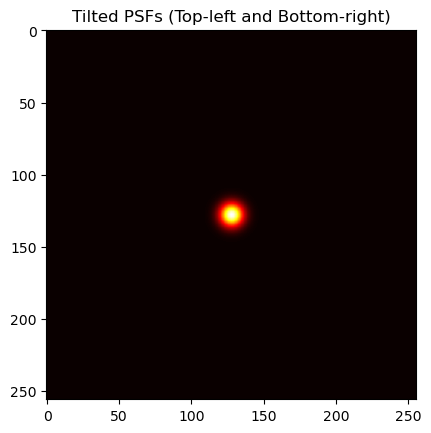

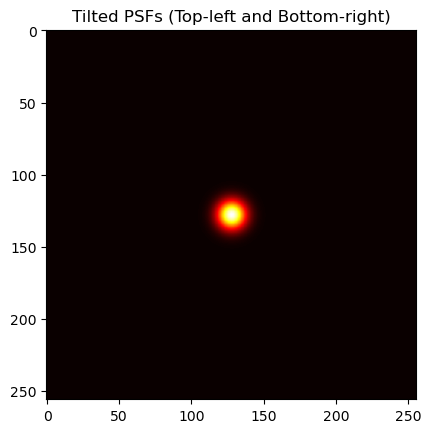

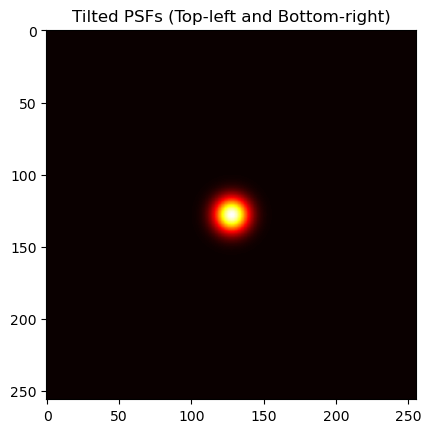

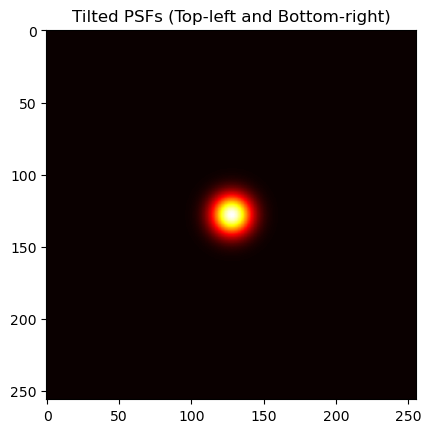

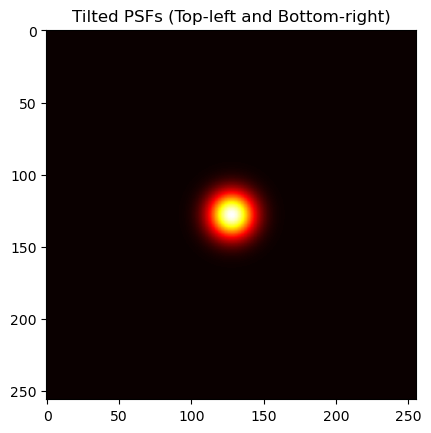

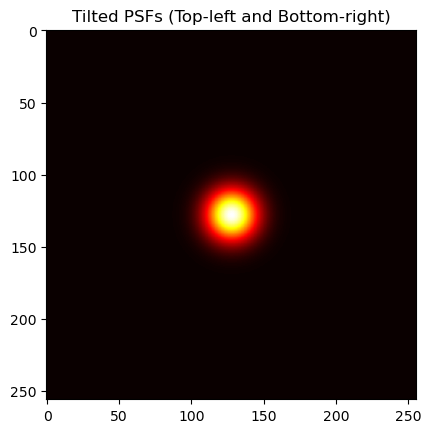

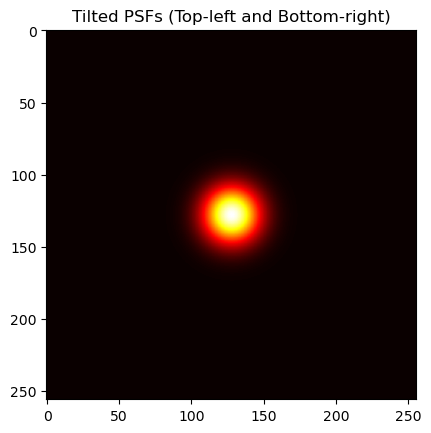

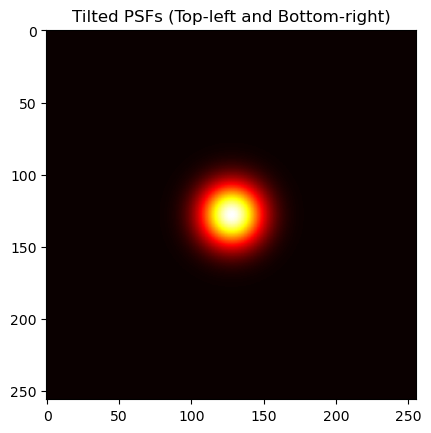

In [27]:
for i in psf_cube :
    plt.imshow(i, cmap='hot')
    plt.title("Tilted PSFs (Top-left and Bottom-right)")
    plt.show()

In [12]:
final_df = pd.DataFrame()
for n_img in range(np.shape(psf_cube)[0]) :
    data = sep.extract(psf_cube[n_img],0.5)
    df = pd.DataFrame(data)

    final_df = pd.concat([df, final_df], ignore_index=True)

In [23]:
final_df = pd.DataFrame()
for n_img in range(np.shape(psf_cube)[0]) :
    img = psf_cube[n_img]

    x,y = centroid_com(img)

    x,y = int(x), int(y)

    cut_x = img[x][:]
    cut_x = img[:,y]

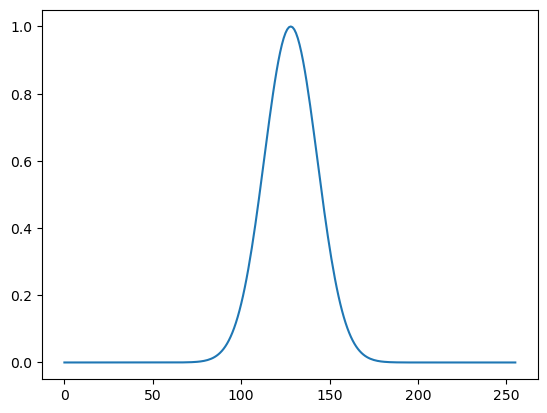

In [26]:
plt.plot(cut_x)

In [22]:
xcut

128.0